# Lecture 6: scikit-learn for Supervised Learning

Today I'll introduce two prototypical machine learning problems: classification and regression, and show how to use the [scikit-learn](http://scikit-learn.org/stable/documentation.html) module to easily try out existing solutions.

## Supervised learning

The most common framework for supervised learning problems is as follows. We have a bunch of data:

$$
\mathbf{X}=\underbrace{\pmatrix{x_{1,1}&x_{1,2}&\ldots&x_{1,k}\\x_{2,1}&x_{2,2}&\ldots&x_{2,k}\\\vdots&\vdots&\ddots&\vdots\\x_{n,1}&x_{n,2}&\ldots&x_{n,k}}}_{\substack{\text{Independent variables /}\\\text{Predictor variables /}\\\text{Features}}}
\hspace{4cm}
\mathbf{y}=\underbrace{\pmatrix{y_1\\y_2\\\vdots\\y_n}}_{\substack{\text{Dependent variables /}\\\text{Outcome variables/}\\\text{Response variables}}},
$$

The rows of $\mathbf{X}$ describe the features of each observation.

The goal is to learn a function $f$ that, given a feature vector $\mathbf{x}$ (a row of the matrix), yields a good prediction $\tilde y$ of the outcome variable $y$.

For example, in the spam filtering homework, you implemented nearest neighbour classification: given a distance measure $\Delta$ on $\mathbf{x}$-values, the model we used was

$$f(\mathbf{x})=y_i\qquad\text{where}\qquad i=\mathop{\arg\min}_j \Delta(\mathbf{x},\mathbf{x_j}).$$

So the idea behind nearest neighbour classification seems to be: if the $x$'s are close, then so are the $y$'s.

The problem is called *supervised* because during training, the method is given access to the output values $\mathbf y$.

The *prediction error* $\text{PE}(\mathbf{\tilde y}, \mathbf{y})$ measures the discrepancy between the predicted outcomes $\mathbf{\tilde y}$ and the actual outcomes $\mathbf{y}$. The prediction error is often defined as the sum or average of the losses for the individual predictions, according to some *loss function*:

$$\text{PE}(\mathbf{\tilde y}, \mathbf{y})=\frac{1}{n}\sum_{i=1}^n L(\tilde y_i, y_i).$$

The most basic machine learning task is to learn a model $f$ that yields a small prediction error. A good model *generalises well*, that means, its prediction error should be small not just on the training data, but also **on new data**.

**Classification.** If the $y_i$ take values in a finite set of labels, then the problem is called *classification*. One example is the spam-nonspam classification you did in the homework. The class labels are not numeric: there is no natural way to measure the difference between two distinct class labels. Therefore, a common loss function is *zero-one loss*:

$$L_{01}(\tilde y, y)=\begin{cases}
0&\text{if $\tilde y=y$,}\\
1&\text{otherwise}
\end{cases}$$

which means the prediction error becomes the frequency of misclassification.

**Regression.** On the other hand if the $y_i$ come from a set with a well defined metric, for example vectors of real numbers, the problem is called *regression*. In this case, there is a distance between the predicted value and the observed value, and the most common loss function is called *squared error*:

$$L(\tilde y, y)=(\tilde y-y)^2.$$

The resulting prediction error is called *mean square prediction error* or MSPE.


### Example: Classification

Here is an example of how we can do classification with SciKit learn. First, we generate a three class data set, with two-dimensional features, to practice with:

In [19]:
import numpy as np

# generate n points on a circular arc running from angle min_a to max_a
# circle of given radius. Points are at a distance from the origin
# equal to the radius plus a standard normal deviation.
def circle(n, min_a, max_a, radius):
    r = radius+np.random.randn(n,1)
    a = min_a+np.random.random((n,1))*(max_a-min_a)
    return np.hstack([r*np.cos(a), r*np.sin(a)])

n = 50
X = np.vstack([circle(n, 0, 2*np.pi, 0), circle(n, 0.3, 0.3+np.pi, 4), circle(n, 0.3+np.pi, 0.3+2*np.pi, 2.5)])
y = np.hstack([0*np.ones(n,dtype='int'), 1*np.ones(n,dtype='int'), 2*np.ones(n,dtype='int')])

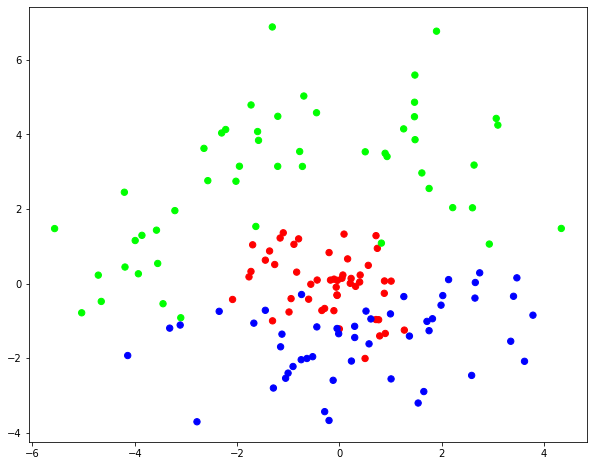

In [20]:
# plot the data set for each pair of dimensions
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
cmap = matplotlib.colors.ListedColormap(['#ff0000', '#00ff00', '#0000ff'])
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=cmap)
plt.show()

We will learn a classifier based on these data. There are several classifiers built into scikit-learn, and we will compare their performance.

In scikit-learn, a classifier is an object of a custom type called an `estimator` type, which has to support two methods:

```
# estimator.fit(X, y)
#
# In:
# - estimator e
# - features X (NumPy n*k matrix; columns are the features)
# - output vector y (NumPy length n vector).
# Out:
# - No output.
# Side effect:
# - The estimator gets fitted on the provided data and can be
#   used to predict future outcomes. (So, the fitted model
#   parameters are stored in the estimator.)


# estimator.predict(X)
#
# In:
# - estimator e (fitted)
# - features X
# Out:
# - predicted output vector y_tilde
```

So, a classifier is an `estimator` object that supports the methods `fit(X, y)` and `predict(X)`.

To get a fair performance estimate, I will first split up the data into a training set and a test set. We will measure the average zero-one loss on the test set to determine the model's performance.

In [21]:
n_tot = len(y)
indices = np.arange(n_tot)
np.random.shuffle(indices) # random permutation of indices
n_train = int(0.8*n_tot)   # total number of training examples
n_test = n_tot - n_train   # total number of test data
Xtrain = X[indices[:n_train]]
ytrain = y[indices[:n_train]]
Xtest  = X[indices[n_train:]]
ytest  = y[indices[n_train:]]

Let's train a Support Vector Machine classifier on these data. I will say more about how SVMs work below.

In [22]:
from sklearn import svm

# create an estimator object that estimates using SVMs.
c_svm = svm.SVC(gamma='auto')

# fit the object using the part of the data set aside for training the model.
c_svm.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
ypred = c_svm.predict(Xtest)

print("predicted:", ypred)
print("actual   :", ytest)
print("Zero-one loss:", sum(ypred!=ytest), "/", n_test)

predicted: [2 1 2 1 0 1 1 1 2 1 0 1 2 1 2 2 1 1 2 1 0 1 1 0 2 2 0 0 0 1]
actual   : [2 1 1 1 0 1 1 1 2 1 0 1 0 1 2 0 1 1 2 1 0 1 1 0 2 2 0 0 0 1]
Zero-one loss: 3 / 30


Finally, let's plot the test data again, highlighting the incorrect predictions in red:

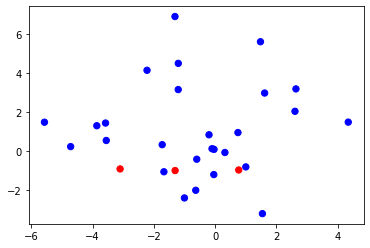

In [24]:
plt.scatter(Xtest[:,0], Xtest[:,1], s=40, c=ypred==ytest, cmap=cmap)
plt.show()

Without doing much work at all, we've learned a predictor that classifies almost all instances correctly! Let's see how we would have fared with a bunch of other classifiers:

In [25]:
from sklearn import neighbors, naive_bayes, tree, linear_model

classifiers = [c_svm, 
               neighbors.KNeighborsClassifier(n_neighbors=1),
               neighbors.KNeighborsClassifier(n_neighbors=3),
               naive_bayes.GaussianNB(),
               tree.DecisionTreeClassifier(),
               linear_model.LogisticRegression(solver='lbfgs', multi_class='auto')]

print("Training")
for c in classifiers:
    c.fit(Xtrain, ytrain)
    
print("Testing")
for c in classifiers:
    loss = sum(c.predict(Xtest)!=ytest)
    print("{:<24}: 01 loss is {:>2}/{:>2}".format(c.__class__.__name__, loss, len(ytest)))

Training
Testing
SVC                     : 01 loss is  3/30
KNeighborsClassifier    : 01 loss is  6/30
KNeighborsClassifier    : 01 loss is  4/30
GaussianNB              : 01 loss is  3/30
DecisionTreeClassifier  : 01 loss is  5/30
LogisticRegression      : 01 loss is  6/30


Later on we'll go into the differences between these methods a bit more.

# Regression example

Regression is the same as classification, except that the output variable is quantitative. Many of the supervised learning methods in scikit-learn are applicable to both classification and regression. Here is an example of a typical regression problem. First we will generate some data by adding random noise to points sampled from a function:

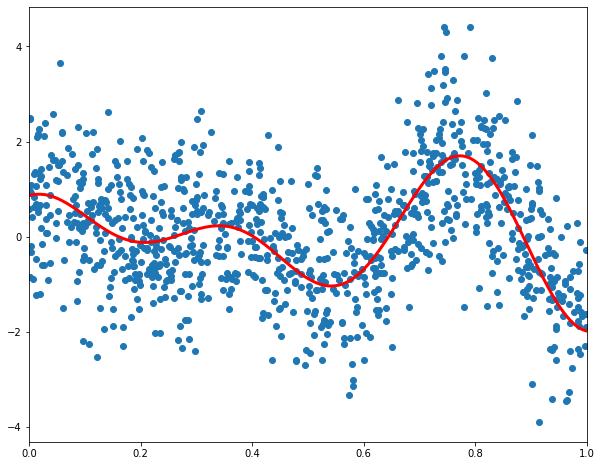

In [26]:
# the x values: uniform from [0,1].
n = 1000
x = np.random.random(n)

# the function that we will attempt to reconstruct:
def f(x):
    return np.sin(11*x)+np.sin(15*x+2.1)

# generate y values
y = f(x) + np.random.randn(n)

# show the data
plt.figure(figsize=(10,8))
xs = np.linspace(0,1,300)
plt.scatter(x, y)
plt.xlim(0,1)
plt.plot(xs, f(xs), 'r', LineWidth=3)
plt.show()


Now, let's try to reconstruct this function from the data. We will not separate a training set from a test set this time: since we know the true distribution, we can evaluate the quality of the model by eye. We will also report the MSPE, the squared prediction error measured on the training data itself. (Warning! Using the training data to measure model performance can lead to *overfitting*. More about that later.)

In [29]:
xs.shape

(300,)

LinearRegression        : MSE = 1.6225265566302258
DecisionTreeRegressor   : MSE = 0.0
SVR                     : MSE = 1.5485717335958786


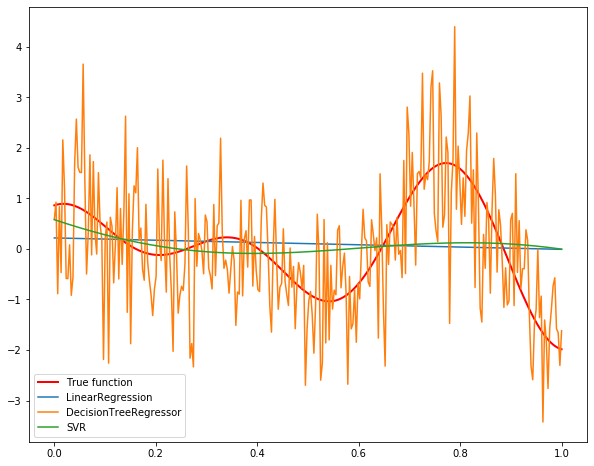

In [27]:
regressors = [linear_model.LinearRegression(),
              tree.DecisionTreeRegressor(),
              svm.SVR(gamma='auto')]

# Turn feature vectors into a matrix
def make_features(x):
    return x.reshape(len(x), 1)


def plot_regressors():
    plt.figure(figsize=(10,8))
    plt.plot(xs, f(xs), 'r', LineWidth=2, label="True function")

    for model in regressors:
        name = model.__class__.__name__
        model.fit(make_features(x), y)
        ys = model.predict(make_features(xs)).reshape(len(xs))
        plt.plot(xs, ys, label=name)
        mse = np.mean((model.predict(make_features(x))-y)**2)
        print("{:<24}: MSE = {}".format(name, mse))
    
    plt.legend()
    plt.show()


plot_regressors()

The SVM model looks best, but actually, none of these regression methods seem to do all that great! And yet, the decision tree model reports an MSE of 0! This is an example of *overfitting*.

## Overfitting and Decision Trees

We say that a model *overfits* a data set when it yields much smaller prediction error on the training set than it would do on an independent data set. In such cases, the training error is misleading: the model's performance on future data will be very poor! That is why we separated a training and test set in the previous exercise.

The decision tree model overfits greatly, with an MSE of 0 but clearly a very poor model of the underlying true function.

A decision tree model is a tree structure, where the internal nodes of the tree test the value of a feature against some threshold.

After a number of such tests, one reaches a leaf of the tree which contains a predicted $y$-value. In this case, what clearly happens is that the decision trees perfectly separates *all* the points in the data set, and predicts the exact observed $y$-value for each of these points. That's how the training error can be zero.

To remedy this, we can tell the model that the leaves of the tree must represent a minimum number of data points. We will redo the experiment with this modification:

LinearRegression        : MSE = 1.6505538907750616
DecisionTreeRegressor   : MSE = 0.947662675543057
SVR                     : MSE = 1.599842815053906


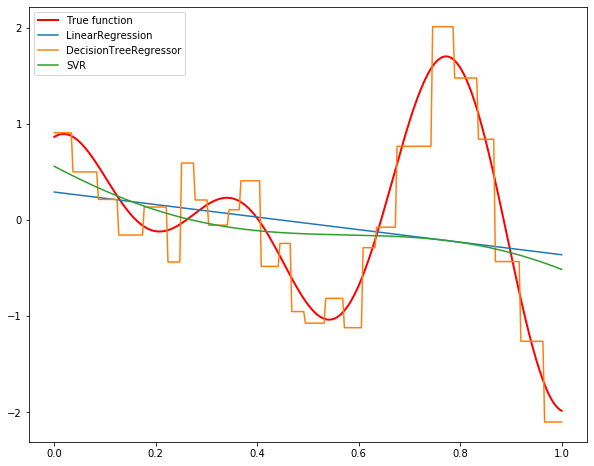

In [10]:
regressors[1] = tree.DecisionTreeRegressor(min_samples_leaf=30)
plot_regressors()

Now the predictions of the decision tree clearly make a whole lot more sense! Next, let's have a look at why the performance of the linear regression is so bad.

## Linear regression

In linear regression, the prediction $\tilde y_i$ of the output variable $y_i$ is predicted as a *linear combination of the features*. In this case there is only one feature, namely the position along the $x$ axis, so you might think that

$$\tilde y_i=\beta\cdot x_i,$$

But in fact, the model by default includes an "intercept": it includes "1" as a feature, so we get

$$\tilde y_i=\beta_1\cdot 1+\beta_2\cdot x_i.$$

(Whether or not the intercept is included by the scikit-learn implementation can be controlled with a parameter.)

In ordinary linear regression, the coefficients $\beta_1,\beta_2$ are determined by *minimizing* the MSPE:

$$\tilde\beta_1,\tilde\beta_2 = \mathop{\arg\min}_{\beta_1,\beta_2}\sum_{i=1}^n(\beta_1+\beta_2 x_i-y_i)^2.$$

For this reason, this method is also called the method of *least squares*.

The model's predictions are a linear combination of the feature value and the intercept, which explains why the resulting predictions look like a straight line.

However, we can help the model out by creating more features! We will do so by adding columns to the feature matrix `X`, letting these columns contain powers of the regular `x` values:

$$X=\pmatrix{%
  1&x_1&x_1^2&x_1^3&x_1^4&x_1^5&x_1^6&x_1^7\\
  1&x_2&x_2^2&x_2^3&x_2^4&x_2^5&x_2^6&x_2^7\\
  \cdots&\cdots&\cdots&\cdots&\cdots&\cdots&\cdots&\cdots\\
  1&x_n&x_n^2&x_n^3&x_n^4&x_n^5&x_n^6&x_n^7}.$$

This way, our linear regression model will learn one parameter for each column (and one more for the intercept): the coefficients of a fifth degree polynomial! So linear regression is much more powerful than you'd think at first glance, as long as you think carefully about what features you provide. Let's see if this design matrix helps improve the regression performance for any of the models we've tried.

LinearRegression        : MSE = 1.0142236795634745
DecisionTreeRegressor   : MSE = 0.947662675543057
SVR                     : MSE = 1.290585652009048


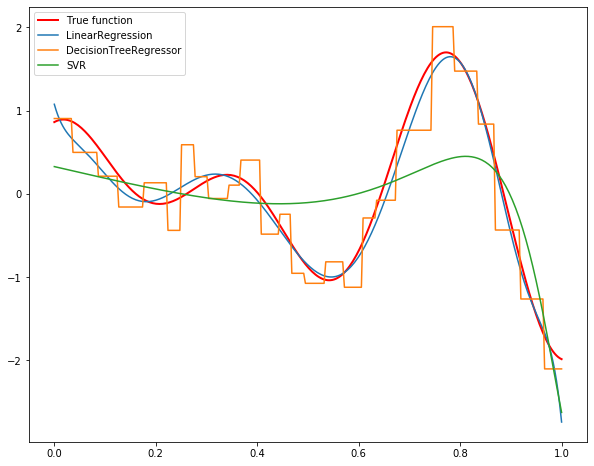

In [11]:
# Overwrite the "make_features" function to turn every observation into
# a row of powers.
def make_features(x):
    X1 = x.reshape(len(x), 1) # turn into two dimensional column vector
    return np.hstack([X1, X1**2, X1**3, X1**4, X1**5, X1**6, X1**7, X1**8, X1**9, X1**10, X1**11])

plot_regressors()

Clearly the performance of the linear regression model have improved substantially, and the SVM also produced a better looking model with a smaller MSE.

Note that the extended feature vectors did not help at all in the case of the decision trees! To see why, think of what the decision tree for the extended design matrix would look like. Every node tests a particular power of $x_i$ against some value. However, testing $x_i^3$ against a value $c$ is the same as testing $x_i$ itself against a value $\sqrt[3]{c}$! So the decision tree model cannot make use of the new features, since they are all monotonic transformations of the original features, and the model is not sensitive to monotonic transformation.

# Support Vector Machines

SVMs are large margin classifiers. That means that they try to find a line in the feature space that separates instances from one class from instances from another class. (If the feature space has many dimensions, the line becomes a hyperplane.)

The distance between that separating hyperplane and the data point closest to it is called the *margin*. SVMs find the separating hyperplane that maximises the margin. Of course sometimes no such hyperplane exists and some points lie on the wrong side of the boundary; in that case the margin is negative.

As described so far, it's a pretty straightforward approach, but there is a further trick, that is known as the *kernel trick*: as it turns out, to find the optimal separating hyperplane you do not actually need to know the coordinates of all the points in feature space: you only need to know the *inner product* between the coordinates for all pairs of points.

This means that it's sometimes possible to map the points into a different, more complex feature space and run the SVM *there*, as long as the inner product between points in this larger feature space can be computed efficiently. That is what a kernel does: given any two data points, it calculates the inner product between these two points after mapping them into a feature space of interest.

The kernel used by default in the SVM regressor is a `rbf`, or "radial basis function" kernel, which is a transformation of the Euclidean distance between two feature vectors. The scale of the kernel can be controlled by the `gamma` parameter. The smaller the parameter, the more smoothing the model applies; the larger the parameter, the more the model will adapt to noise and small scale features of the data.

Some experimentation shows that the performance of the SVM regression is greatly improved if we change `gamma` to a value near `50`.

LinearRegression        : MSE = 1.0142236795634745
DecisionTreeRegressor   : MSE = 0.947662675543057
SVR                     : MSE = 1.000587645850474


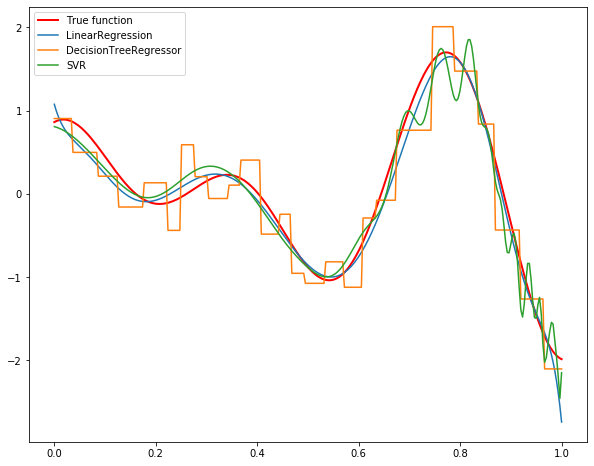

In [12]:
regressors[2] = svm.SVR(gamma = 50)
plot_regressors()